11490434/11490434 [==============================] - 3s 0us/step
Epoch 1/50
235/235 [==============================] - 5s 12ms/step - loss: 0.2776 - val_loss: 0.1913
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1709 - val_loss: 0.1531
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1435 - val_loss: 0.1331
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1280 - val_loss: 0.1209
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1180 - val_loss: 0.1126
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1109 - val_loss: 0.1070
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1059 - val_loss: 0.1026
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1023 - val_loss: 0.0996
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0997 - val_loss: 0.0974
Epoch 10/50
235/235 [=======

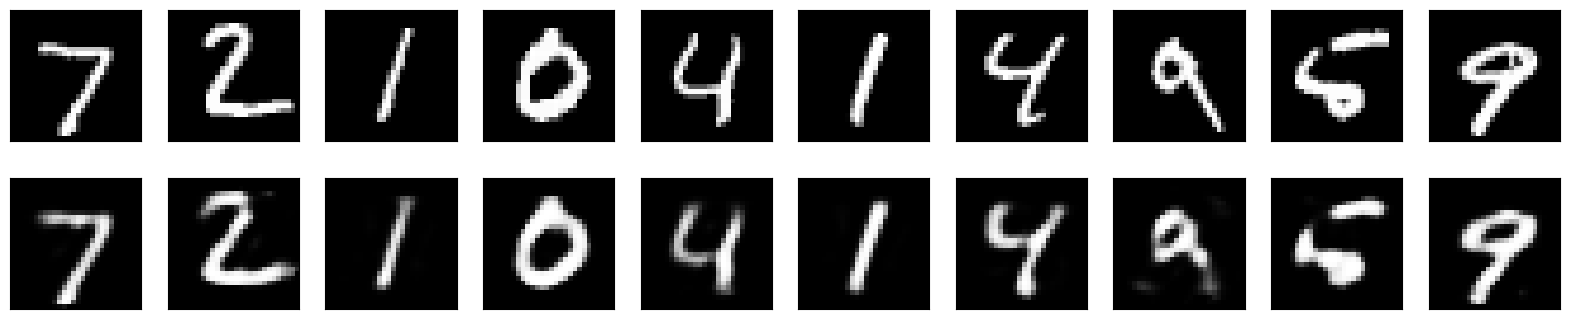

In [2]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data() 
x_train= x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 
input_dim = x_train.shape[1] 
encoding_dim = 32 
input_img = tf.keras.Input(shape=(input_dim,)) 
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img) 
decoded = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoded) 
autoencoder = tf.keras.Model(input_img, decoded) 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test)) 
reconstructed_images = autoencoder.predict(x_test) 
n = 10  
plt.figure(figsize=(20, 4)) 
for i in range(n): 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed_images[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 
plt.show()

